# Linear Regression

https://en.wikipedia.org/wiki/Linear_regression

![Linear Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/440px-Linear_regression.svg.png)

독립변수와 종속변수간의 선형 상관 관계를 모델링하는 방법입니다. 

***Simple Linear Regression(단순 선형 회귀)***

독립변수가 1개인 경우

$
y = \alpha + \beta x
$

[![youtube](https://img.youtube.com/vi/nk2CQITm_eo/0.jpg)](https://www.youtube.com/watch?v=nk2CQITm_eo)

***Multiple Linear Regression(다중 선형 회귀)***

독립변수가 여러개인 경우

$
y = \alpha + \beta x{_1} + \gamma x{_2}
$

학습을 통해 x 값과 y 값 쌍을 가장 잘 설명할 수 있는 파라미터를 찾습니다.

## Ordinary Least Squares

Linear Regression 의 해를 구하기 위한 다양한 모델 추정 기법 중에 최소 제곱법을 이용합니다. 일반적인 간단한 선형 회귀 방법으로 정규화 (Regularized) 선형 회귀 모델에 비해 과적합(Overfit) 되기 쉽습니다.  

## Lasso Regression

선형회귀에서 L1 정규화(Regularization)을 추가하여 과적합을 방지하는 모델입니다. 

정규화는 회귀를 통해서 구하고자 하는 가중치 값에 페널티를 주어 0에 가깝게 만들어 불필요한 변수의 영향을 최소화 시키는 방법입니다.

L1 정규화는 페널티로 가중치 합만큼을 주게되며, 이는 일정 값 이하의 영향력을 가진 변수가 제거되는 효과를 내게 되어(변수 선택의 효과) 과적합을 방지합니다. 따라서, 무의미한 변수가 많이 포함된 희소(Sparse)한 데이터 셋에 적합한 모델입니다.   

## Ridge Regression

선형회귀에서 L2 정규화(Regularization)을 추가하여 과적합을 방지하는 모델입니다.

L2 정규화는 페널티로 가중치의 제곱값의 합만큼을 주게되며, 이는 가중치가 클수록 페널티를 더 많이 받게 되므로 coefficient의 값이 smooth 해지게 됩니다. 이렇게 되면 전체적으로 모델 또한 일반화되는 효과를 나타내게 되어 과적합이 방지됩니다.

## Elastic Net Regression

선형 회귀에서 L1, L2 정규화를 추가하여 과적합을 방지하는 모델입니다.

L1, L2 정규화의 비율을 l1_ratio 파라미터를 이용하여 조정합니다. l1_ratio 값이 1.0 이면 이는 Lasso Regression 0 이면 Ridge Regression과 같게 됩니다. Elastic Net는 특히 고차원 데이터 셋에서 좋은 성능을 나타냅니다.

## SGDRegression

SGDRegression 은 Stochastic Gradient Descent 방식을 통해 대용량 데이터(샘플이 10000개 이상)에 대한 Linear 모델의 효율적인 최적화 학습을 제공합니다.

SGDRegression 은 loss 함수 및 penalty 설정에 따라 다른 Linear 모델이 수행됩니다.

loss
* loss="squared_loss": Ordinary least squares,
* loss="huber": Huber loss for robust regression,
* loss="epsilon_insensitive": linear Support Vector Regression.


penalty
* ‘l2’, ‘l1’, or ‘elasticnet’
* The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.

l1_ratio
* The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Defaults to 0.15.


In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import sklearn

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"sklearn ver={sklearn.__version__}")

python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
pandas ver=1.2.4
numpy ver=1.19.5
sklearn ver=0.24.2


data shape: xs=(1000, 1), ys=(1000,)
train shape: train_xs=(700, 1), train_ys=(700,)
test shape: test_xs=(300, 1), test_ys=(300,)


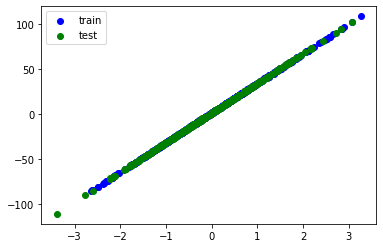


model=LinearRegression()
coefficient=[32.880]
intercept=0.9880446765501734
r_square=0.99992


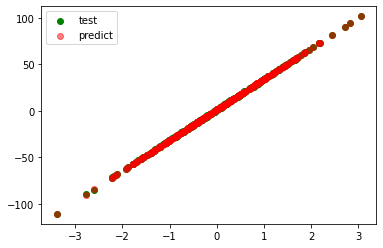


model=Lasso(alpha=0.01)
coefficient=[32.871]
intercept=0.9883757081252946
r_square=0.99992


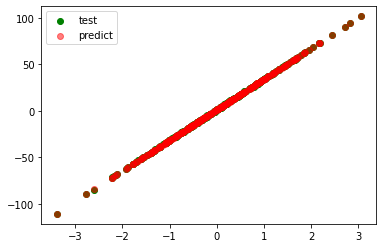


model=Ridge(alpha=0.01)
coefficient=[32.880]
intercept=0.988060225453842
r_square=0.99992


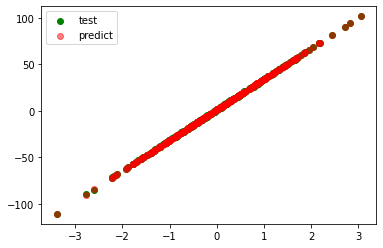


model=ElasticNet(l1_ratio=0.25)
coefficient=[19.435]
intercept=1.4788501440195883
r_square=0.83256


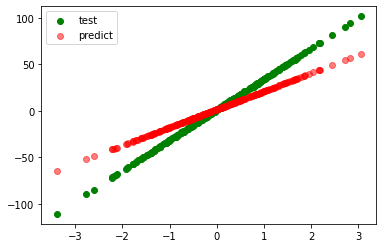


model=ElasticNet(l1_ratio=0.75)
coefficient=[26.249]
intercept=1.2301058601794166
r_square=0.95923


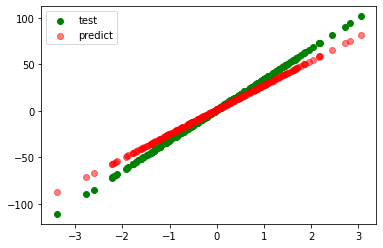


model=SGDRegressor()
coefficient=[32.877]
intercept=[0.990]
r_square=0.99992


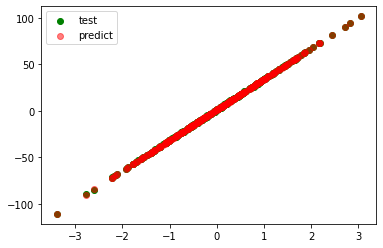

In [2]:
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터
n_samples = 1000
xs, ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise=0.3, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=rseed) # 난수 발생용 Seed 값
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    xs, ys, 
    test_size=0.3, shuffle=True, random_state=rseed)
print(f"train shape: train_xs={train_xs.shape}, train_ys={train_ys.shape}")
print(f"test shape: test_xs={test_xs.shape}, test_ys={test_ys.shape}")
plt.scatter(train_xs, train_ys, label='train', c='b')
plt.scatter(test_xs, test_ys, label='test', c='g')
plt.legend()
plt.show()

# 모델
models = [
    linear_model.LinearRegression(),
    linear_model.Lasso(alpha=0.01), # alpha 값는 Regularization의 강도를 나타냅니다.
    linear_model.Ridge(alpha=0.01), # alpha 값는 Regularization의 강도를 나타냅니다. 
    linear_model.ElasticNet(l1_ratio=0.25), # l1_ratio는 L1 정규화의 가중치를 나타냅니다.
    linear_model.ElasticNet(l1_ratio=0.75), # l1_ratio는 L1 정규화의 가중치를 나타냅니다.   
    linear_model.SGDRegressor()
]

for model in models:
    # 학습
    print(f"\nmodel={model}")
    model.fit(train_xs, train_ys)

    # 평가
    pred_ys = model.predict(test_xs)

    # 선형 회귀 모델링을 통해 얻은 coefficient, intercept 입니다.
    print(f"coefficient={model.coef_}")
    print(f"intercept={model.intercept_}")
    
    # 평가: 테스트 데이터에 대해서 R2 값을 구합니다. R2 는 1.0 에 가까울 수록 선형 회귀 모델이 데이터를 잘 설명하고 있다는 것입니다.
    r_square = metrics.r2_score(test_ys, pred_ys)
    print(f"r_square={r_square:.5f}")
    
    plt.scatter(test_xs, test_ys, label='test', c='g')
    plt.scatter(test_xs, pred_ys, label='predict', c='r', alpha=0.5)
    plt.legend()
    plt.show()